In [30]:
import cv2
import matplotlib.pyplot as plt

In [31]:
# !pip uninstall opencv-python
# !pip install opencv-python-headless

In [32]:
img=cv2.imread("./logo.png")

In [33]:
dim=img.shape

print(dim)

(99, 82, 3)


In [34]:
gray_img=cv2.imread("logo.png",cv2.IMREAD_GRAYSCALE)

In [35]:
dim=gray_img.shape

print(dim)

(99, 82)


### Reading a video and storing in a reverse way

In [36]:
import cv2
import argparse


In [37]:
def decode_fourcc(fourcc):
    fourcc_int=int(fourcc)

    fourcc_decode=""
    for i in range(4):
        int_v=fourcc_int >> 8 * i & 0xFF
        fourcc_decode +=chr(int_v)

    return fourcc_decode

## to give command line arguments

In [38]:
parser=argparse.ArgumentParser()

parser.add_argument("video_path",help="Countdown8.mp4")

parser.add_argument("output_path",help="ReverseCountdown8.mp4")

args=parser.parse_args()

usage: ipykernel_launcher.py [-h] video_path output_path
ipykernel_launcher.py: error: the following arguments are required: output_path


SystemExit: 2

C:\Users\vivek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [39]:
capture=cv2.VideoCapture("./Countdown8.mp4")

frame_width=capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = capture.get(cv2.CAP_PROP_FPS)
codec = decode_fourcc(capture.get(cv2.CAP_PROP_FOURCC))
print("codec: '{}'".format(codec))

codec: 'h264'


In [46]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create VideoWriter object. We use the same properties as the input camera.
# Last argument is False to write the video in grayscale. True otherwise (write the video in color)
out = cv2.VideoWriter("./ReverseVideo.mp4", fourcc, int(fps), (int(frame_width), int(frame_height)), True)

# Check if camera opened successfully
if capture.isOpened() is False:
    print("Error opening video stream or file")

In [47]:
frame_index = capture.get(cv2.CAP_PROP_FRAME_COUNT) - 1
print(frame_index)

329.0


In [48]:
capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = capture.read()

In [49]:
# ret, frame = capture.read()
# if ret is True:
#     cv2.imshow('Original Frame', frame)

329.0
True


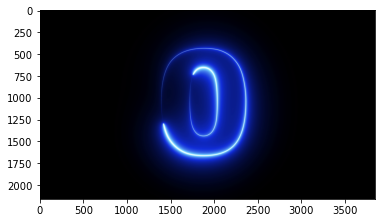

In [50]:
print(frame_index)

capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = capture.read()
print(ret)
plt.imshow(frame)

In [51]:
out = cv2.VideoWriter("ReverseVideo.mp4", fourcc, int(fps), (int(frame_width), int(frame_height)))

while capture.isOpened() and frame_index >=0:
    capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = capture.read()
    if ret is True:
        #cv2.imshow('Original Frame', frame)
        out.write(frame)
        frame_index-=1
    else:
        break
        
capture.release()
out.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
